In [1]:
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
from statistics import stdev, mean

# Normal Distribution Confidence Interval

In [2]:
def norm_ci(confidence_interval: float = 0.90,
            population_std_dev: float = 1,
            number_of_samples:int = 1,
            mean: float = 0,
            two_sided: bool = True
            ):
    '''
    

    Parameters
    ----------
    confidence_interval : float, optional
        DESCRIPTION. The default is 0.90.
    population_std_dev : float, optional
        DESCRIPTION. The default is 1.
    number_of_samples : int, optional
        DESCRIPTION. The default is 100.
    mean : float, optional
        DESCRIPTION. The default is 0.
    two_sided : bool, optional
        DESCRIPTION. The default is True.

    Returns
    -------
    TYPE
        DESCRIPTION.

    '''
    # declaring problem constants
    x_bar = mean
    n = number_of_samples # number of samples taken
    sigma = population_std_dev # population standard deviation
    sigma_x_bar = sigma/n**0.5 # std dev of sample means
    
    # generate x within 3.5 standard deviations and y axes
    x_axis_lower_bound = x_bar-3.5*sigma_x_bar
    x_axis_upper_bound = x_bar+3.5*sigma_x_bar
    steps = (x_axis_upper_bound-x_axis_lower_bound)/1000
    x = np.arange(x_axis_lower_bound,x_axis_upper_bound,steps)
    y = norm.pdf(x,loc=x_bar,scale=sigma_x_bar)
    
    # get the probabilities of the tail areas
    if two_sided:
        alpha_high = (1+confidence_interval)/2
        alpha_low = (1-confidence_interval)/2
    else:
        alpha_high = confidence_interval
        alpha_low = 0
    # compute the value of x_lower and x_higher
    x_lower = norm.ppf(alpha_low,loc=x_bar,scale=sigma_x_bar)
    x_higher = norm.ppf(alpha_high,loc=x_bar,scale=sigma_x_bar)
    
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='red')
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,3), round(x_higher,3)

# t- distribution Confidence Interval

In [3]:
def t_ci(confidence_interval: float = 0.90,
            sample_std_dev: float = 1,
            number_of_samples:int = 2,
            mean: float = 0,
            two_sided: bool = True
            ):
    '''
    

    Parameters
    ----------
    confidence_interval : float, optional
        DESCRIPTION. The default is 0.90.
    sample_std_dev : float, optional
        DESCRIPTION. The default is 1.
    number_of_samples : int, optional
        DESCRIPTION. The default is 100.
    mean : float, optional
        DESCRIPTION. The default is 0.
    two_sided : bool, optional
        DESCRIPTION. The default is True.

    Returns
    -------
    TYPE
        DESCRIPTION.

    '''
    # declaring problem constants
    x_bar = mean
    n = number_of_samples # number of samples taken
    sigma = sample_std_dev # population standard deviation
    sigma_x_bar = sigma/n**0.5 # std dev of sample means
    df = n-1 # degrees of freedom
    
    # generate x within 3.5 standard deviations and y axes
    x_axis_lower_bound = x_bar-3.5*sigma_x_bar
    x_axis_upper_bound = x_bar+3.5*sigma_x_bar
    steps = (x_axis_upper_bound-x_axis_lower_bound)/1000
    x = np.arange(x_axis_lower_bound,x_axis_upper_bound,steps)
    y = t.pdf(x,df, loc=x_bar,scale=sigma_x_bar)
    
    # get the probabilities of the tail areas
    if two_sided:
        alpha_high = (1+confidence_interval)/2
        alpha_low = (1-confidence_interval)/2
    else:
        alpha_high = confidence_interval
        alpha_low = 0
    # compute the value of x_lower and x_higher
    x_lower = t.ppf(alpha_low,df,loc=x_bar,scale=sigma_x_bar)
    x_higher = t.ppf(alpha_high,df,loc=x_bar,scale=sigma_x_bar)
    
    # plot and shade the graphs
    plt.plot(x,y,'-')
    plt.fill_between(x[x>=x_lower],y[x>=x_lower],color='green')
    plt.fill_between(x[x>=x_higher],y[x>=x_higher],color='white')
    plt.draw()
    return round(x_lower,3), round(x_higher,3)

# Read the dataset

In [4]:
df = pd.read_csv('SA1_Group_17.csv', index_col='Index')
display(df.head())
display(df.describe())
display(df.dtypes)

,SL_NO,ST_CODE,DIST_CODE,TTM_CODE,SECTOR_CODE,VT_CODE,WORKED_FOR_1D,CLOSED_Y,OPER_DUR_MM,OPER_DUR_DD,SURVEY_CODE,NIC_CODE,PERM_REG_Y,FACTORY_ACT,INIT_PROD_Y,UNIT_TYPE,ANCI_UNIT,ORG_TYPE,WOMAN_ENT,MKT_VAL_FA,ORI_PURC_VAL_PM,PM_INST_Y,EMP_TOTAL,EMP_MALE,EMP_FEMALE,EMP_CHILD,EMP_SC,EMP_ST,EMP_OBC,EMP_OTHER,POWER_SRC,PROD1_CODE,PROD2_CODE,PROD3_CODE,PROD4_CODE,PROD5_CODE,ACTI_NATURE,OPER_NATURE,MAN_BY,MAN_CASTE,REG_UNDER_SPR,ACC_EXIST,COMP_EXIST,KNOW_HOW,GOP_Year3,GOP_Year2,GOP_Year1,VOE_Year3,OS_LOAN_Year3,OS_INST_SRC,OS_NONINST_SRC,NET_Year2,NET_Year3,NET_STATUS_Year2,REPAYMENT_DELAY,DECLINE_IN_GOP,DMD_PROB,WORK_CAP_PROB,RAW_MTRL_PROB,POWER_RPOB,LABOUR_PROB,MKT_PROB,EQUIP_PROB,MGMT_PROB
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36592,100497,28,12,0,2,,1,,8,,1,20221,1986,3,1986,2,2,1,2,15000,5000,1987,2,2,,,,,2,,1,,,,,,3,1,1,3,2,2,2,4,24000,20000,30000,0,2,,,16500,16500,2,,2,,,,,,,,
27979,6244,28,23,,2,423140,1,,12,,1,28111,1994,3,1993,1,2,1,2,25000,15000,1993,4,3,1,,1,,2,1,5,96855,,76101,,,1,1,1,3,2,2,2,4,40000,42000,37000,0,2,,,39000,49000,2,,2,,,,,,,,
36927,35052,28,3,42,2,,1,,10,27,1,22211,1988,3,1988,1,2,1,1,60000,40000,1988,3,3,,,,,3,,5,56199,,,,,1,1,1,3,2,2,2,4,40800,39500,39000,0,2,,,90600,102200,2,,2,,,,,,,,
60600,58872,28,8,34,2,8102,1,,12,,1,26954,1994,2,1995,1,2,1,2,150000,80000,1995,8,5,3,,3,0,5,0,5,29111,,,,,1,1,1,4,2,2,2,4,35000,42000,42000,0,1,1,2,101000,109503,2,2,2,,,,,,,,
17480,49085,28,21,,2,,1,,12,,1,28111,1997,1,1997,1,2,1,2,80000,80000,1997,6,6,,,,,4,2,5,71592,,,,,1,1,1,4,2,1,2,1,410000,385000,260000,0,2,,,215000,280000,2,,2,,,,,,,,


,SL_NO,ST_CODE,DIST_CODE,SECTOR_CODE,WORKED_FOR_1D,OPER_DUR_MM,SURVEY_CODE,NIC_CODE,FACTORY_ACT,UNIT_TYPE,ANCI_UNIT,ORG_TYPE,WOMAN_ENT,MKT_VAL_FA,ORI_PURC_VAL_PM,EMP_TOTAL,POWER_SRC,ACTI_NATURE,OPER_NATURE,MAN_BY,MAN_CASTE,REG_UNDER_SPR,ACC_EXIST,COMP_EXIST,KNOW_HOW,GOP_Year3,VOE_Year3,OS_LOAN_Year3,NET_Year3,NET_STATUS_Year2,DECLINE_IN_GOP
count,10000.000000,10000.0,10000.000000,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,52067.961100,28.0,11.786400,1.526900,1.0,10.559000,1.0,27352.147900,2.559300,1.215700,1.958600,1.18630,1.949500,8.547566e+05,3.245659e+05,5.885900,4.48510,1.470900,1.163300,1.027600,3.466400,1.967500,1.718400,1.933100,3.689500,9.259034e+07,2.855352e+04,1.772700,1.200584e+06,1.992100,1.852800
std,30483.215545,0.0,5.885137,0.499301,0.0,2.111437,0.0,12039.225546,0.700095,0.411328,0.199224,0.54756,0.218985,5.466470e+06,1.791879e+06,10.858502,1.37607,0.824998,0.460711,0.163832,0.721611,0.177333,0.449802,0.249861,0.717733,9.081048e+09,1.225493e+06,0.419109,8.056149e+06,0.088535,0.354323
min,1.000000,28.0,1.000000,1.000000,1.0,0.000000,1.0,15111.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,-3.500000e+06,1.000000,1.000000
25%,25620.750000,28.0,6.000000,1.000000,1.0,10.000000,1.0,15544.000000,2.000000,1.000000,2.000000,1.00000,2.000000,5.000000e+04,2.000000e+04,2.000000,5.00000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,4.000000,4.666250e+04,0.000000e+00,2.000000,5.700000e+04,2.000000,2.000000
50%,52285.000000,28.0,13.000000,2.000000,1.0,12.000000,1.0,26931.000000,3.000000,1.000000,2.000000,1.00000,2.000000,1.500000e+05,5.045000e+04,3.000000,5.00000,1.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,4.000000,1.000000e+05,0.000000e+00,2.000000,1.590000e+05,2.000000,2.000000
75%,77988.250000,28.0,16.000000,2.000000,1.0,12.000000,1.0,29246.000000,3.000000,1.000000,2.000000,1.00000,2.000000,5.000000e+05,1.900000e+05,6.000000,5.00000,2.000000,1.000000,1.000000,4.000000,2.000000,2.000000,2.000000,4.000000,3.800000e+05,0.000000e+00,2.000000,5.112225e+05,2.000000,2.000000
max,680398.000000,28.0,23.000000,2.000000,1.0,12.000000,1.0,93010.000000,3.000000,2.000000,2.000000,5.00000,2.000000,3.653958e+08,8.961474e+07,350.000000,7.00000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,9.081050e+11,9.430860e+07,2.000000,4.269214e+08,2.000000,2.000000


SL_NO                int64
ST_CODE              int64
DIST_CODE            int64
TTM_CODE            object
SECTOR_CODE          int64
VT_CODE             object
WORKED_FOR_1D        int64
CLOSED_Y            object
OPER_DUR_MM          int64
OPER_DUR_DD         object
SURVEY_CODE          int64
NIC_CODE             int64
PERM_REG_Y          object
FACTORY_ACT          int64
INIT_PROD_Y         object
UNIT_TYPE            int64
ANCI_UNIT            int64
ORG_TYPE             int64
WOMAN_ENT            int64
MKT_VAL_FA           int64
ORI_PURC_VAL_PM      int64
PM_INST_Y           object
EMP_TOTAL            int64
EMP_MALE            object
EMP_FEMALE          object
EMP_CHILD           object
EMP_SC              object
EMP_ST              object
EMP_OBC             object
EMP_OTHER           object
POWER_SRC            int64
PROD1_CODE          object
PROD2_CODE          object
PROD3_CODE          object
PROD4_CODE          object
PROD5_CODE          object
ACTI_NATURE          int64
O

# 1.	Calculate a 95 percent confidence interval for the “Gross output – Year 3 (Rs)

In [5]:
df.GOP_Year3.mean()

92590335.5937

Mean of Gross output – Year 3 of population is expected to lie between Rs. -85416490.064 and Rs. 270597161.251


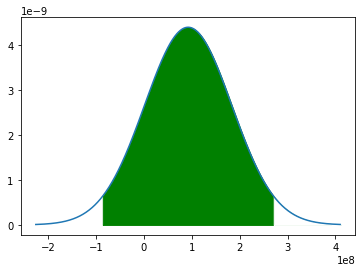

In [6]:
confidence_interval = 0.95
sample_std_dev = df.GOP_Year3.std()
number_of_samples = len(df.GOP_Year3)
sample_mean = df.GOP_Year3.mean()
lower, higher = t_ci(confidence_interval,sample_std_dev,number_of_samples,sample_mean)
print('Mean of Gross output – Year 3 of population is expected to lie between Rs. {} and Rs. {}'.format(lower,higher))

# Question 4

## a.	What is the probability that a firm selected at random is a SSSBE unit

In [7]:
# filter only SSSBE units
p = len(df[df.UNIT_TYPE==2])/len(df)
print(f'Probability = {p}')

Probability = 0.2157


# 5.	Test the null hypothesis that the population average of the variable “Value of Exports for Year 3” = 87,300.  Carry out a one sided test.  Clearly state your null and alternate hypotheses.
Null hypothesis H0: Population mean of VOE_Year3 = 87,300 <br>
Alternate Hypothesis H1: Population mean of VOE_Year3 ≠ 87,300 <br>
We will setup a one sided confidence interval of 0.95 <br>
Since population standard deviation is not given to us we will use sample standard deviation and use t table

Sample Mean for Value of Exports for Year 3 is expected to lie between Rs. -inf and Rs. 107459.441
Does sample mean falls within above range? Ans: True and the value 28553.5212
The t value for sample mean:8.304663866157408e-07


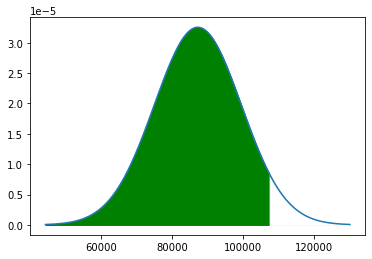

In [8]:
confidence_interval = 0.95
sample_std_dev = df.VOE_Year3.std()
number_of_samples = len(df.VOE_Year3)
mean = 87300
two_sided = False
lower, higher = t_ci(confidence_interval,sample_std_dev,number_of_samples,mean,two_sided)
sample_mean = df.VOE_Year3.mean()
print('Sample Mean for Value of Exports for Year 3 is expected to lie between Rs. {} and Rs. {}'.format(lower,higher))
print(f'Does sample mean falls within above range? Ans: {lower<=sample_mean<=higher} and the value {sample_mean}')
print(f'The t value for sample mean:{t.cdf(sample_mean,df=number_of_samples-1,loc=mean,scale=sample_std_dev/number_of_samples**0.5)}')